In [1]:
%cd ..

c:\Users\Stefo\Programming\Spam-Filter


# MULTINOMIAL



In [2]:
import pandas as pd

from scripts.load_dataset import load_dataset
from scripts.naive_bayes import naive_bayes
from scripts.evaluate import evaluate
from scripts.visual_comparisson import create_barplots

from preprocessing.non_english_word_removal import remove_non_english_words
from preprocessing.stop_word_reomval import reomve_stop_words


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stefo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
calculation_type = 'multinomial'

In [4]:
dataset = load_dataset('./data/emails.csv')
dataset_english_only = remove_non_english_words(dataset)
dataset_removed_stop_words = reomve_stop_words(dataset)
dataset_english_only_no_stop_words = reomve_stop_words(dataset_english_only)

In [5]:
x, y = naive_bayes(calculation_type, dataset)
x2, y2 = naive_bayes(calculation_type, dataset_english_only)
x3, y3 = naive_bayes(calculation_type, dataset_removed_stop_words)
x4, y4 = naive_bayes(calculation_type, dataset_english_only_no_stop_words)

In [6]:
data = {
    'no_filter': evaluate(x, y, calculation_type),
    'english_filter': evaluate(x2, y2, calculation_type),
    'stop_filter': evaluate(x3, y3, calculation_type),
    'english_stop_filter': evaluate(x4, y4, calculation_type)
}

Number of mislabeled points out of a total 1293 points : 81
Accuracy of Gaussian model: 93.7354988399072
Number of mislabeled points out of a total 1293 points : 80
Accuracy of Gaussian model: 93.81283836040217
Number of mislabeled points out of a total 1293 points : 71
Accuracy of Gaussian model: 94.50889404485692
Number of mislabeled points out of a total 1293 points : 72
Accuracy of Gaussian model: 94.43155452436196


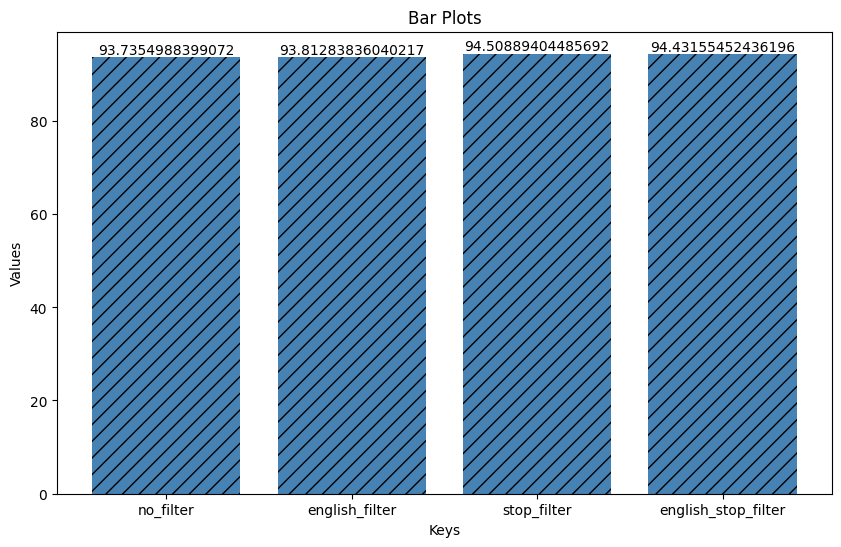

In [7]:
create_barplots(data)